In [1]:
import math
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
input_file = '/data1/lmh_data/MINE/GM12878_H3K9me3_H3K27me3/analyse/HeLa_H3K9me3_H3K27me3/experiment/SDOC/result/HeLa_SDOC.tsv'
infos = pd.read_csv(input_file, sep="\t", header=None)
infos

,0,1,2,3,4,5
0,chr1,2190000,3430000,55,0.153494,1.740066
1,chr1,3430000,5990000,30,0.488190,0.886652
2,chr1,5990000,6700000,2,0.112054,0.497438
3,chr1,6700000,7650000,14,0.113645,1.191529
4,chr1,7650000,7970000,7,0.035545,1.445664
...,...,...,...,...,...,...
2604,chr9,136730000,136790000,7,0.007350,2.293912
2605,chr9,136790000,136940000,0,0.038754,-0.562592
2606,chr9,136940000,137120000,3,0.058019,0.817690
2607,chr9,137120000,137280000,0,0.041934,-0.562592


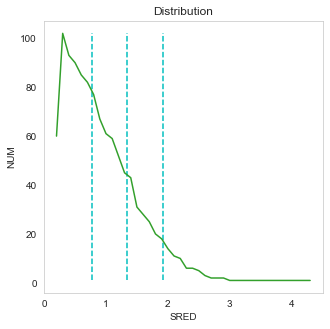

In [3]:
result = infos.loc[infos[3]>0].loc[:,5].round(1).value_counts().sort_index()
x = result.index.tolist()
y = result.values.tolist()

_sigma = infos.loc[infos[3]>0].loc[:,5].std()
_min = infos.loc[infos[3]>0].loc[:,5].min()
_thresholds = [_min+i*_sigma for i in range(1, 4)]

sns.set_style("whitegrid") 
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(5, 5), sharey=True)
axes.grid(False)
axes.plot(x, y, color=(51/255, 160/255, 44/255))

plt.xlabel('SRED')
plt.ylabel('NUM')
plt.title('Distribution')

for i in range(3):
    plt.vlines(_thresholds[i], result.values.min(), result.values.max(), colors = "c", linestyles = "dashed")
plt.show()

In [4]:
colors = [
    (0, 159/255, 232/255),
    (222/255, 28/255, 38/255),
    (0, 191/255, 82/255),
    (255/255, 122/255, 23/255)
]
my_pal = {"small": colors[0], "middle": colors[1], "high": colors[2], "very_high": colors[3]}

In [5]:
small = infos.loc[infos[3]>0].loc[infos[5]<_thresholds[0]].copy()
middle = infos.loc[infos[3]>0].loc[infos[5]>=_thresholds[0]].loc[infos[5]<_thresholds[1]].copy()
high = infos.loc[infos[3]>0].loc[infos[5]>=_thresholds[1]].loc[infos[5]<_thresholds[2]].copy()
very_high = infos.loc[infos[3]>0].loc[infos[5]>=_thresholds[2]].copy()

small["degree"] = "small"
middle["degree"] = "middle"
high["degree"] = "high"
very_high["degree"] = "very_high"

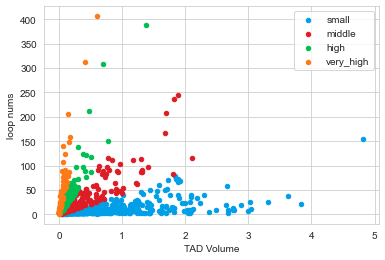

In [6]:
small["TAD Volume"] = small.loc[:, 4]
middle["TAD Volume"] = middle.loc[:, 4]
high["TAD Volume"] = high.loc[:, 4]
very_high["TAD Volume"] = very_high.loc[:, 4]

small["loop nums"] = small.loc[:, 3]
middle["loop nums"] = middle.loc[:, 3]
high["loop nums"] = high.loc[:, 3]
very_high["loop nums"] = very_high.loc[:, 3]

ax = small.plot.scatter(x='TAD Volume', y='loop nums', color=my_pal["small"], label='small')
ax = middle.plot.scatter(x='TAD Volume', y='loop nums', color=my_pal["middle"], label='middle', ax=ax)
ax = high.plot.scatter(x='TAD Volume', y='loop nums', color=my_pal["high"], label='high', ax=ax)
ax = very_high.plot.scatter(x='TAD Volume', y='loop nums', color=my_pal["very_high"], label='very_high', ax=ax)

fig = ax.get_figure()

In [7]:
def find_special_tad(df):
    df = df.copy()
    df["score"] = df["TAD Volume"] * df["loop nums"]
    _special = df.sort_values(by="score", ascending=False)[:5].copy()
    return _special

In [8]:
find_special_tad(small)

,0,1,2,3,4,5,degree,TAD Volume,loop nums,score
698,chr13,51130000,72710000,155,4.822833,0.662660,small,4.822833,155,747.539095
1284,chr2,20650000,27690000,59,2.656117,0.555115,small,2.656117,59,156.710930
1148,chr18,3710000,7180000,78,1.845513,0.759954,small,1.845513,78,143.950045
677,chr13,37060000,39610000,72,1.886502,0.724327,small,1.886502,72,135.828149
708,chr13,80360000,94360000,37,3.630109,0.360607,small,3.630109,37,134.314038


In [9]:
find_special_tad(middle)

,0,1,2,3,4,5,degree,TAD Volume,loop nums,score
1702,chr3,43540000,50620000,244,1.885831,1.212970,middle,1.885831,244,460.142762
665,chr13,21610000,23890000,237,1.827846,1.215661,middle,1.827846,237,433.199419
666,chr13,23890000,26180000,208,1.697138,1.185228,middle,1.697138,208,353.004634
2102,chr6,29630000,34420000,167,1.675990,1.112778,middle,1.675990,167,279.890371
461,chr11,64160000,69090000,116,2.114635,0.844711,middle,2.114635,116,245.297618


In [10]:
find_special_tad(high)

,0,1,2,3,4,5,degree,TAD Volume,loop nums,score
1188,chr18,76710000,79380000,388,1.370967,1.646525,high,1.370967,388,531.935318
2060,chr5,175460000,179500000,308,0.693664,1.847662,high,0.693664,308,213.648385
685,chr13,45510000,46480000,150,0.782801,1.426541,high,0.782801,150,117.420135
1359,chr2,98610000,100260000,211,0.473415,1.857520,high,0.473415,211,99.890528
1708,chr3,53940000,56560000,117,0.501957,1.513722,high,0.501957,117,58.728985


In [11]:
find_special_tad(very_high)

,0,1,2,3,4,5,degree,TAD Volume,loop nums,score
1357,chr2,88740000,98400000,406,0.599511,2.034124,very_high,0.599511,406,243.401406
448,chr11,48170000,57340000,313,0.409000,2.072170,very_high,0.409000,313,128.016967
465,chr11,70460000,71450000,206,0.143023,2.570168,very_high,0.143023,206,29.462808
1744,chr3,123560000,124750000,158,0.180062,2.179760,very_high,0.180062,158,28.449850
1667,chr3,10320000,11380000,149,0.162403,2.234254,very_high,0.162403,149,24.198061
